# Project 7 - Logistic Regression and Support Vector Machines

## Notebook imports and settings

In [1]:
# Python imports

# Numerical imports
import numpy as np
import pandas as pd

# SkLearn imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting settings
sns.set()
sns.set_palette("colorblind")
sns.set_style("ticks")

## Load and format data

In [2]:
red_wine = pd.read_csv("./data/winequality-red.csv", sep=";", dtype=float).sample(frac=1)
white_wine = pd.read_csv("./data/winequality-white.csv", sep=";", dtype=float).sample(frac=1)

# Threshold for 1 = good, 0 = bad; threshold value chosen for 50/50 dataset split
red_wine["quality"][red_wine["quality"] < 6] = 0
red_wine["quality"][red_wine["quality"] >= 6] = 1

white_wine["quality"][white_wine["quality"] < 5] = 0
white_wine["quality"][white_wine["quality"] >= 5] = 1

combined_wine = pd.concat([red_wine, white_wine])

# Split into test / train
split = int(0.8 * len(red_wine))
red_wine_train = red_wine[:split]
red_wine_test = red_wine[split:]

split = int(0.8 * len(white_wine))
white_wine_train = white_wine[:split]
white_wine_test = white_wine[split:]

split = int(0.8 * len(combined_wine))
combined_wine_train = combined_wine[:split]
combined_wine_test = combined_wine[split:]

print("____WHITE WINE____")
display(white_wine.tail(3))

print("____RED WINE____")
display(red_wine.tail(3))

print("____BOTH WINES____")
display(combined_wine.tail(3))

____WHITE WINE____


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3423,7.1,0.18,0.39,14.5,0.051,48.0,156.0,0.99947,3.35,0.78,9.1,1.0
4574,6.2,0.20,0.26,9.7,0.030,39.0,102.0,0.99080,3.08,0.56,12.9,1.0
4053,7.4,0.16,0.27,15.5,0.050,25.0,135.0,0.99840,2.90,0.43,8.7,1.0


____RED WINE____


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1487,6.0,0.64,0.05,1.9,0.066,9.0,17.0,0.99496,3.52,0.78,10.6,0.0
1232,7.6,0.43,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,0.0
427,9.5,0.78,0.22,1.9,0.077,6.0,32.0,0.99880,3.26,0.56,10.6,1.0


____BOTH WINES____


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3423,7.1,0.18,0.39,14.5,0.051,48.0,156.0,0.99947,3.35,0.78,9.1,1.0
4574,6.2,0.20,0.26,9.7,0.030,39.0,102.0,0.99080,3.08,0.56,12.9,1.0
4053,7.4,0.16,0.27,15.5,0.050,25.0,135.0,0.99840,2.90,0.43,8.7,1.0


## Logistic Regression

In [3]:
y = combined_wine[["quality"]]
X = combined_wine.drop("quality", axis=1)

precision, recall, f1 = 0., 0, 0.

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index].values.flatten()
    
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index].values.flatten()
    
    clf = LogisticRegression(random_state=0, max_iter=20_000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred)
    precision += f
    recall += r
    f1 += f
    
precision /= 5
recall /= 5
f1 /= 5

print(f"Precision with bad wine:  {precision[0]:.4f}")
print(f"Precision with good wine: {precision[1]:.4f}")
print()

print(f"Recall with bad wine:     {recall[0]:.4f}")
print(f"Recall with good wine:    {recall[1]:.4f}")
print()

print(f"F1 Score with bad wine:   {f1[0]:.4f}")
print(f"F1 Score with good wine:  {f1[1]:.4f}")

Precision with bad wine:  0.5783
Precision with good wine: 0.9413

Recall with bad wine:     0.4973
Recall with good wine:    0.9632

F1 Score with bad wine:   0.5783
F1 Score with good wine:  0.9413


## Support Vector Machine (SVM)

In [4]:
y = combined_wine[["quality"]]
X = combined_wine.drop(["quality"], axis=1)

precision, recall, f1 = 0., 0, 0.

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X, y):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index].values.flatten()
    
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index].values.flatten()
    
    clf = SVC(decision_function_shape="ovr", probability=True, kernel="rbf", gamma=0.1, class_weight="balanced").fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred)
    precision += f
    recall += r
    f1 += f
    
precision /= 5
recall /= 5
f1 /= 5

print(f"Precision with bad wine:  {precision[0]:.4f}")
print(f"Precision with good wine: {precision[1]:.4f}")
print()

print(f"Recall with bad wine:     {recall[0]:.4f}")
print(f"Recall with good wine:    {recall[1]:.4f}")
print()

print(f"F1 Score with bad wine:   {f1[0]:.4f}")
print(f"F1 Score with good wine:  {f1[1]:.4f}")

Precision with bad wine:  0.5880
Precision with good wine: 0.9190

Recall with bad wine:     0.6789
Recall with good wine:    0.8954

F1 Score with bad wine:   0.5880
F1 Score with good wine:  0.9190


## Plotting

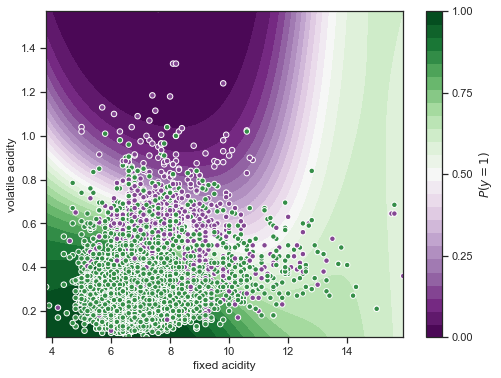

In [8]:
df = combined_wine.copy()
col1 = "fixed acidity"
col2 = "volatile acidity"
# col1 = "sulphates"
# col2 = "chlorides"
target = "quality"

X, y = df[[col1, col2]], df[[target]].values.flatten()
clf = SVC(probability=True, kernel="rbf", gamma=0.05, class_weight="balanced", break_ties=True).fit(X, y)

xx, yy = df[[col1]].values.flatten(), df[[col2]].values.flatten()
xx, yy = np.mgrid[xx.min() : xx.max() : 0.01, yy.min() : yy.max() : 0.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="PRGn", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])

ax.scatter(X[col1].values.flatten(), X[col2].values.flatten(), c=y, s=30, cmap="PRGn", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(xlim=(xx.min(), xx.max()), ylim=(yy.min(), yy.max()), xlabel=col1, ylabel=col2)

plt.savefig("./images/wine-quality-4.png")
plt.show()